In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


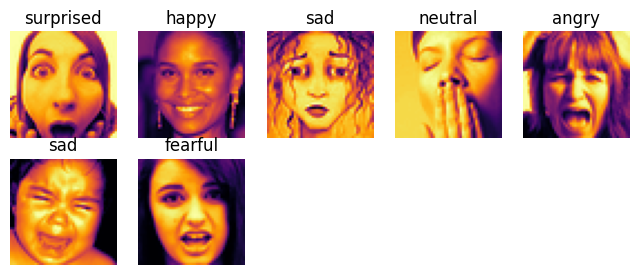

Images shape: (32, 48, 48, 1)
Labels shape: (32,)
Images shape: (32, 48, 48, 1)
Labels shape: (32,)


In [18]:
train_data_path = 'archive/train'
test_data_path = 'archive/test'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    labels="inferred",
    label_mode="int",       
    color_mode="grayscale",
    batch_size=32,
    image_size=(48, 48),
    shuffle=True
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(48, 48),
    shuffle=False
)
class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(7): 
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='inferno')
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

for images, labels in test_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)




In [4]:
train_ds = train_ds.map(lambda x, y: (x/255.0, y))
test_ds = test_ds   .map(lambda x, y: (x/255.0, y))

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model.fit(train_ds, callbacks=[early_stopping], validation_data=test_ds, epochs=20)

model.summary()

Epoch 1/20


d:\brief_05_detection_demotions_faciales\myvenv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 114s 122ms/step - accuracy: 0.2999 - loss: 1.7237 - val_accuracy: 0.4139 - val_loss: 1.5411
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.4215 - loss: 1.4919 - val_accuracy: 0.4812 - val_loss: 1.3682
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.4734 - loss: 1.3798 - val_accuracy: 0.4955 - val_loss: 1.3097
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.5003 - loss: 1.3053 - val_accuracy: 0.5152 - val_loss: 1.2696
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.5228 - loss: 1.2576 - val_accuracy: 0.5283 - val_loss: 1.2355
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.5383 - loss: 1.2139 - val_accuracy: 0.5235 - val_loss: 1.2569
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.5547 - loss: 1.1726 - val_accuracy: 0.5393 - val_loss: 1.2187
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5674 - loss: 1.1334 - val_accur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,067,543 (4.07 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,696 (2.71 MB)

In [6]:
import os

model.save('models/emotion_model.h5')
print("Modèle sauvegardé dans models/emotion_model.h5")


Modèle sauvegardé dans models/emotion_model.h5


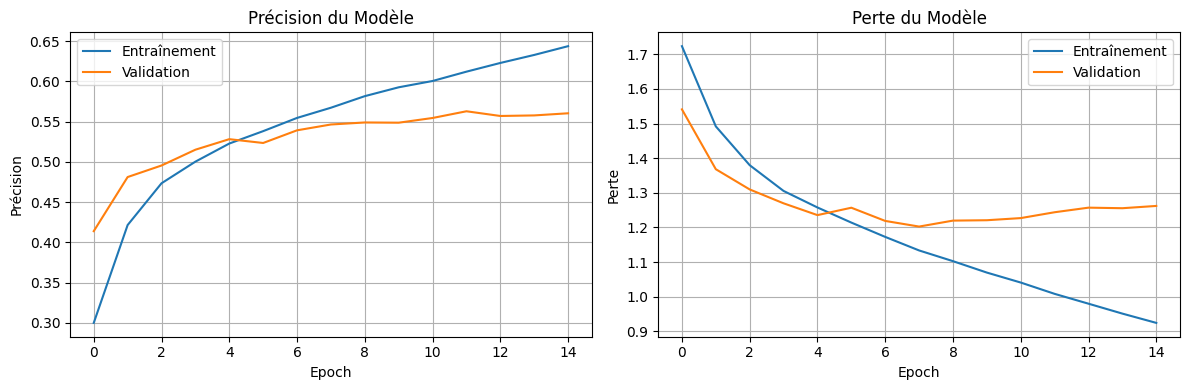

In [9]:
import numpy as np
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du Modèle')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)

# Graphique de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du Modèle')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


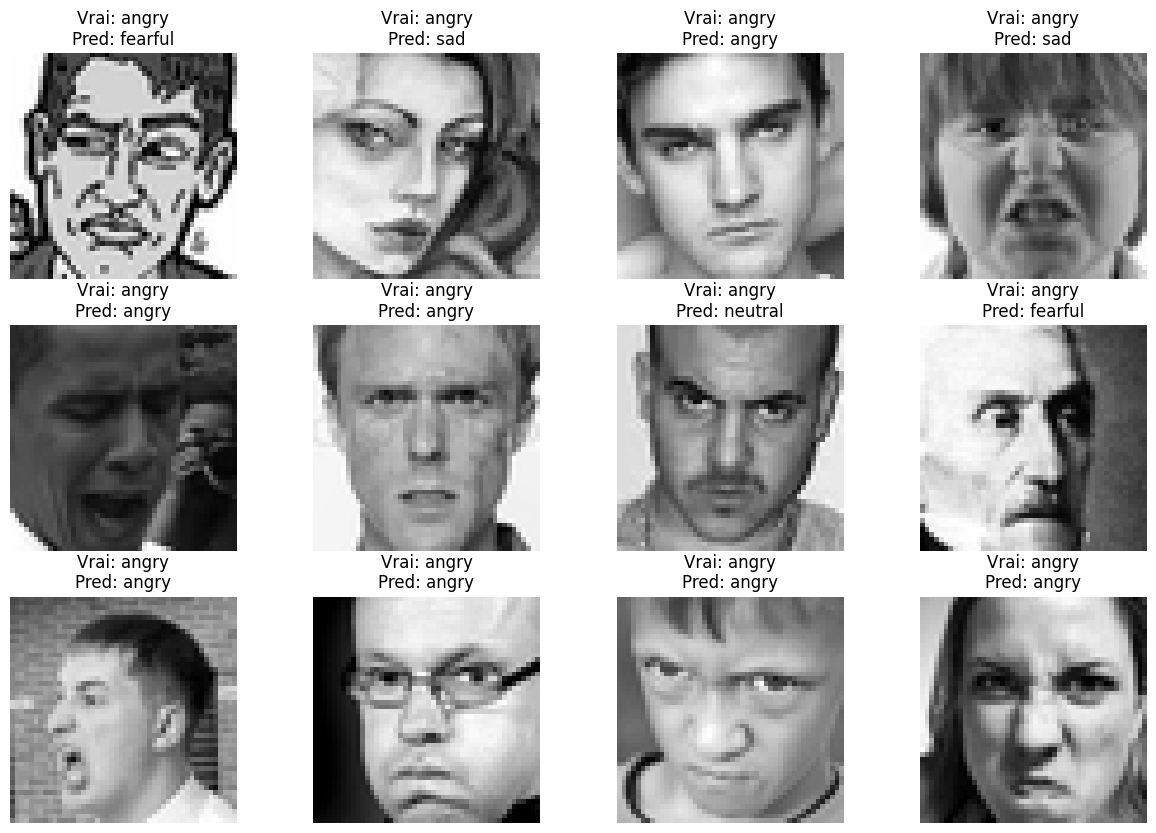

In [10]:
plt.figure(figsize=(15, 10))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.axis('off')
        plt.title(f"Vrai: {class_names[labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}")
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.show()

In [11]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


if face_cascade.empty():
    raise Exception("Échec du chargement du fichier Haar Cascade. Vérifie le chemin.")
else:
    print("Haar Cascade chargé ")

Haar Cascade chargé 


In [12]:

image = cv2.imread("image.png")

if image is None:
    raise Exception("L'image n'a pas été trouvée. Vérifie le nom du fichier ou son emplacement.")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [13]:
faces = face_cascade.detectMultiScale(
    gray,              
    scaleFactor=1.1,   
    minNeighbors=5,    
    minSize=(30, 30)  
)

print(f"Nombre de visages détectés : {len(faces)}")

Nombre de visages détectés : 1


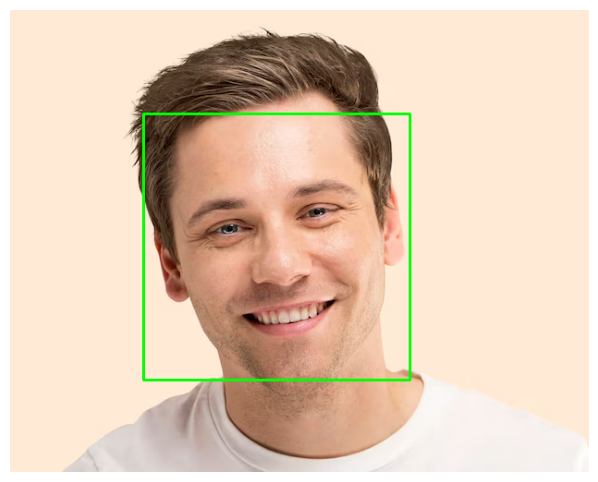

In [14]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

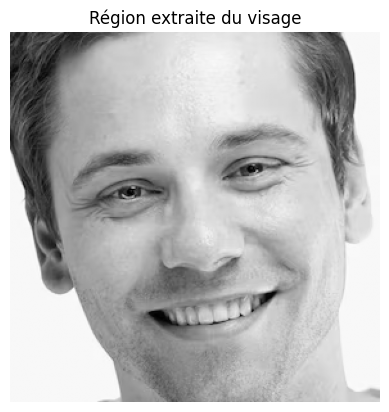

In [15]:

if len(faces) == 0:
    raise Exception("Aucun visage détecté.")
else:
    # On prend le premier visage détecté
    (x, y, w, h) = faces[0]

    # Extraire la région du visage
    face_roi = gray[y:y+h, x:x+w]  # on utilise l’image en niveaux de gris

    plt.imshow(face_roi, cmap='gray')
    plt.axis('off')
    plt.title("Région extraite du visage")
    plt.show()


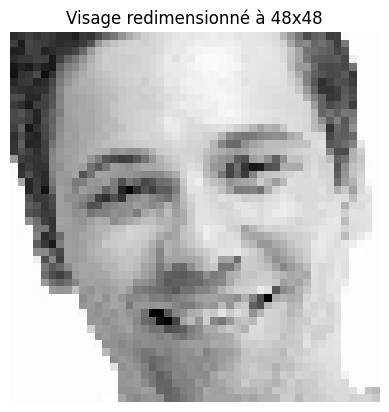

In [16]:
# Taille d'entrée attendue par le CNN (ex: 48x48 pour Emotion CNN)
target_size = (48, 48)

# Redimensionner
face_resized = cv2.resize(face_roi, target_size)

plt.imshow(face_resized, cmap='gray')
plt.axis('off')
plt.title("Visage redimensionné à 48x48")
plt.show()


In [17]:
face_normalized = face_resized / 255.0

# Ajouter une dimension batch et canal
# (48,48) → (1,48,48,1) pour un CNN en niveaux de gris
face_input = np.expand_dims(face_normalized, axis=(0, -1))

print("Forme de l'entrée CNN :", face_input.shape)

Forme de l'entrée CNN : (1, 48, 48, 1)
